# Laboratorio de regresión lineal

Laura Rodriguez 24-09-24

Expendiente: 738962|   |

La regresión lineal es una heramienta útil para predecir una respuesta cuantitativa. A pesar de que existen soluciones más modernas, la regresión lineal se sigue usando, pues sirve como un punto de partida para comparar otras herramientas.

Se debe comprender cómo funciona la regresión antes de empezar a estudiar métodos de aprendizaje estadístico más complejos.

1. Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [269]:
import pandas as pd

df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

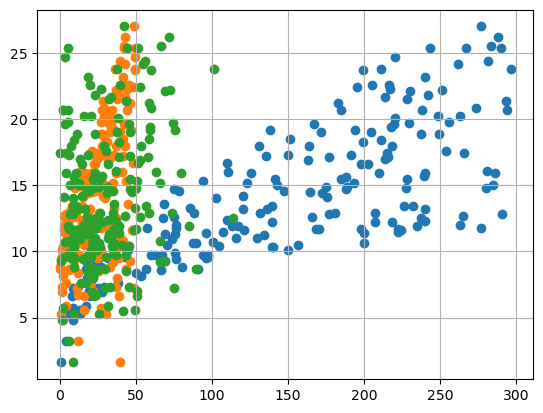

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


x1 = df["TV"]
x2 = df["radio"]
x3 = df["newspaper"]
y = df["sales"] 


plt.figure()
plt.scatter(x1, y)
plt.scatter(x2, y)
plt.scatter(x3, y)
plt.grid()


**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

## Regresión lineal simple

Un método sencillo para predecir una variable cuantitativa $Y$ dado un solo predictor $X$. Podemos escribir esta relación como:

$$ Y \approx \beta_0 + \beta_1 X$$

Por ejemplo, si decimos que $X$ se refiere a lo gastado en publicidad de TV y que $Y$ son las ventas, podemos buscar:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

A $\beta_0$ y $\beta_1$ se le conoce como los coeficientes o parámetros del modelo. Una vez que usamos los datos históricos para producir estimados $\hat{\beta_0}$ y $\hat{\beta_1}$, podemos predecir ventar futuras basándonos en lo gastado en publicidad en TV usando
$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $$

donde $\hat{y}$ indica una predicción de $Y$ basado en $X = x$. (El símbolo $\hat{ }$ se usa para hacer notar que es sólo una estimación de un parámetro desconocido)

### Estimando coeficientes

$\beta_0$ y $\beta_1$ son desconocidos. Se deben estimar usando los datos antes de poder predecir. 

$ (x_1, y_1), (x_2, y_2), ..., (x_n, y_n) $ representa $n$ observaciones, cada una con datos medidos para $X$ y $Y$.

El archivo de publicidad contiene observaciones de 200 mercados y presupuestos usados para publicidad en 3 medios. Nuestra meta actual es encontrar $\hat{\beta_0}$ y $\hat{\beta_1}$ tal que exista un modelo lineal que se ajuste bien a los datos ($y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$  para $ i=1,...,n$).

Hay muchas formas de medir el ajuste de una curva; la más común es usar el criterio de los mínimos cuadrados. Si $y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$ es una predicción de $Y$ basada en el valor número $i$ de $X$, entonces definimos el error/residuo como $e_i = y_i - \hat{y_i}$. Este residuo es la diferencia entre el valor observado y el valor estimado por nuestro modelo lineal. Definimos la suma de los residuos cuadrados (RSS) como:
$$ \text{RSS} = e_1^2 + e_2^2 + ... + e_n^2 $$

Utiliza la función `minimize` del módulo `optimize` la librería `scipy` para estimar los parámetros del modelo.

In [29]:
print(df.columns)


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


In [74]:
import numpy as np
import scipy.optimize as opt

x_tv = df['TV'].values
y_sales = df['sales'].values

num_obs = len(y_sales)
X_matriz = np.hstack((np.ones([num_obs, 1]), x_tv.reshape(num_obs, 1)))
y_vector = y_sales.reshape(num_obs, 1)

num_params = X_matriz.shape[1]
beta_inicial = np.random.rand(num_params) #valores aleatorios 

def calcular_rss(beta, X, y):
    beta = beta.reshape([num_params, 1])
    y_pred = X @ beta  # Predicción de y usando los coeficientes beta
    residual = y_pred - y  # Error entre la predicción y los valores reales
    rss_value = residual.T @ residual  # Calcular RSS
    return rss_value[0, 0]


coef_intercepto, coef_pendiente = resultado_optimizado.x
opt.minimize(calcular_rss, beta_inicial, args=(X_matriz, y_vector))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2102.530583132666
        x: [ 7.033e+00  4.754e-02]
      nit: 6
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 9.870e-03 -5.012e-05]
            [-5.012e-05  3.409e-07]]
     nfev: 27
     njev: 9

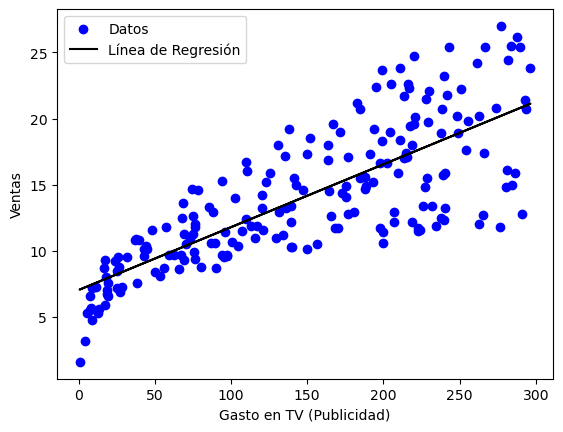

In [55]:
y_pred = beta_0 + beta_1 * X


plt.scatter(X, y, color= 'blue' , label='Datos')
plt.plot(X, y_pred, color= 'black' , label='Línea de Regresión')
plt.xlabel('Gasto en TV (Publicidad)')
plt.ylabel('Ventas')
plt.legend()
plt.show()

Al resolver el problema analíticamente se encuentra:

$$ \hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x} $$


Compara las estimaciones que encontraste con `minimize` con las que se encuentran con la fórmula dada arriba ($\bar{x}$ y $\bar{y}$ son las medias muestrales).

In [59]:
# Calcular medias de X y Y
x_media = X.mean()
y_media = y.mean()

# Calcular beta_1 (pendiente)
beta1 = sum((X - x_mean) * (y - y_mean)) / sum((X - x_mean) ** 2)

# Calcular beta_0 (intercepto)
beta0 = y_media - beta1 * x_media


beta1, beta0

(0.047536640433019736, 7.0325935491276965)

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión.

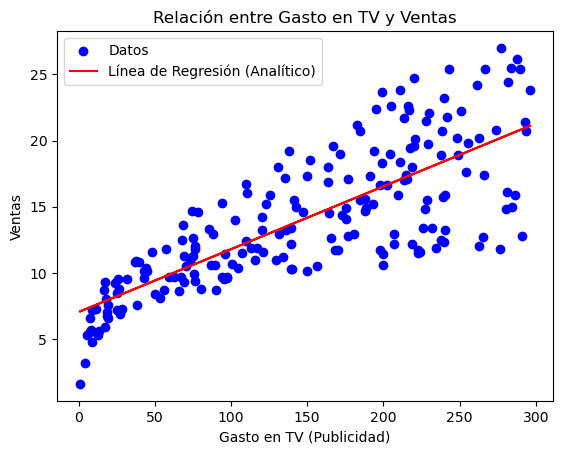

In [66]:
# Predicciones usando la línea de regresión (método analítico)
y_pred = beta0 + beta1 * X

# Graficar datos originales
plt.scatter(X, y, color='blue', label='Datos')

# Graficar línea de regresión
plt.plot(X, y_pred, color='red', label='Línea de Regresión (Analítico)')
plt.xlabel('Gasto en TV (Publicidad)')
plt.ylabel('Ventas')
plt.title('Relación entre Gasto en TV y Ventas')
plt.legend()
plt.show()


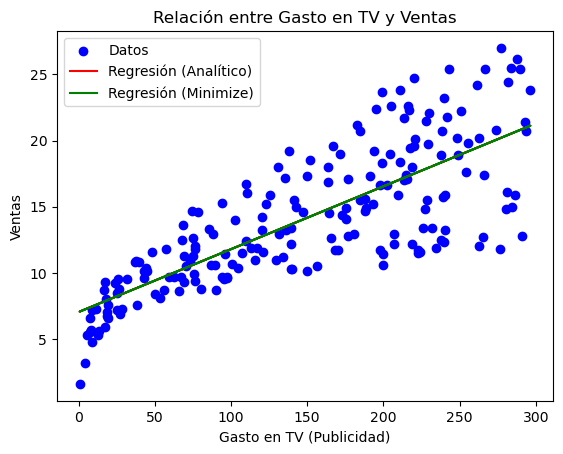

In [72]:
# Predicciones usando la línea de regresión (minimize)
y_pred_minimize = beta_0 + beta_1 * X

# esto es para fraficar datos originales
plt.scatter(X, y, color='blue', label='Datos')

# esto es para graficar línea de regresión 
plt.plot(X, y_pred_analitico, color='red', label='Regresión (Analítico)')

# lo usamos para graficar línea de regresión (minimize)
plt.plot(X, y_pred_minimize, color='green', label='Regresión (Minimize)')

plt.xlabel('Gasto en TV (Publicidad)')
plt.ylabel('Ventas')
plt.title('Relación entre Gasto en TV y Ventas')
plt.legend()
plt.show()

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

Una población es el total de elementos de interés en un estudio(pueden ser personas, objetos, lugares, etc) mientras que la muestra es una parte de esa población seleccionada para su análisis (por ejemplo un grupo de baile que represente a todos lo grupos de Mexico). 

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

En la regresión con todos los datos de la población tendríamos precisión y exactitud ya que utilizaríamos toda la información y nuestro error sería muy mínimo mientras que si es con una muestra de ella, habría más error porque estamos infiriendo y haciendo estimaciones ya que solo contamos con una parte de la población

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-2}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [97]:
import numpy as np
import scipy.optimize as opt

x_tv = df['TV'].values
y_sales = df['sales'].values

num_obs = len(y_sales)
X_matrix = np.c_[np.ones(num_obs), x_tv]  
y_vector = y_sales

num_params = X_matrix.shape[1]
beta_inicial = np.random.rand(num_params)  # Valores iniciales aleatorios

def calcular_rss(beta, X, y):
    y_pred = X @ beta  # Predicción de y usando los coeficientes beta
    residual = y_pred - y  # Error entre la predicción y los valores reales
    rss_value = residual.T @ residual  # Calculo de RSS
    return rss_value

resultado_optimizado = opt.minimize(calcular_rss, beta_inicial, args=(X_matrix, y_vector))
coef_intercepto, coef_pendiente = resultado_optimizado.x

y_pred = X_matrix @ resultado_optimizado.x
residuals = y_vector - y_pred
RSS = (residuals**2).sum()
RSE = np.sqrt(RSS / (num_obs - 2))  

x_mean = x_tv.mean()
x_var = ((x_tv - x_mean)**2).sum()

SE_beta1 = RSE / np.sqrt(x_var)  
SE_beta0 = RSE * np.sqrt(1 / num_obs + (x_mean**2) / x_var)  


coef_intercepto, coef_pendiente, SE_beta0, SE_beta1

(7.03259793457633,
 0.047536610712672844,
 0.4578429402736196,
 0.0026906071877976995)

Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm \text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [115]:

ICb0l = coef_intercepto - 1.96 * SE_beta0
ICb0u = coef_intercepto + 1.96 * SE_beta0
ICb1l = coef_pendiente - 1.96 * SE_beta1
ICb1u = coef_pendiente + 1.96 * SE_beta1

# Intervalos de confianza completos
IC_beta_0 = [ICb0l, ICb0u]
IC_beta_1 = [ICb1l, ICb1u]

IC_beta_0, IC_beta_1


([6.135225771640036, 7.929970097512625],
 [0.04226302062458935, 0.05281020080075634])

Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

*En la hipótesis nula no hay relación entre la variable X y la variable Y, y establece que el coeficiente de beta1 es igual a cero y la hipótesis alternativa nos dice que sí hay una relación entre las variables X y Y, y establece que beta1 es diferente de cero*

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [117]:
t_beta_0 = (beta_0 - 0) / SE_beta_0

t_beta_0

15.36027486089141

In [119]:
t_beta_1 = (beta_1 - 0) / SE_beta_1

t_beta_1

17.66762401090023

La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-2))`

In [126]:
from scipy import stats

# Calcular p-valor para beta_0 (intercepto)
t_bj = t_beta_0
p_beta_0 = 2 * (1 - stats.t.cdf(np.abs(t_bj), n-2))

# Calcular p-valor para beta_1 (pendiente)
t_bj = t_beta_1
p_beta_1 = 2 * (1 - stats.t.cdf(np.abs(t_bj), n-2))

p_beta_0, p_beta_1

(0.0, 0.0)

¿Se rechaza la hipótesis nula? ¿Qué significa?

Sí se rechaza y significa no hay relación entre las variables (el coeficiente es cero). Dado que el p-valor es tan bajo, podemos estar seguros de que esta hipótesis no es cierta. 

### Verificando la precisión del modelo

Si ya tenemos unos coeficientes de regresión estimados y ya verificamos que la probabilidad de que sí hay relación entre predictor y respuesta es alta. ¿Cómo medimos qué tan bueno es nuestro modelo para predecir?
- RSE (Residual Standard Error)
- $R^2$

#### $R^2$

El RSE se mide con unidades de $Y$, así que no siempre se puede saber cuál es un buen valor. Imagina que tienes un $Y$ con valores entre $-1$ y $1$, y que tienes otro $Y$ con valores entre $1'000,000$ y $100'000,000$. Los errores cuadrados van a ser mucho mayores en el segundo caso que en el primero, pero esto no significa que el modelo creado en el segundo caso sea malo.

El estadístico $R^2$ es una medida de ajuste. Su valor es la proporción de la varianza sí explicada, así que siempre toma valores entre $0$ y $1$. Su fórmula es:

$$ R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}$$
$$ \text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$$

TSS mide la varianza total de $Y$. RSS mide la varianza que queda sin explicarse después de la regresión. Entonces TSS-RSS mide la varianza que sí está explicada.

$R^2$ mide la proporción de la varianza en $Y$ que puede ser explicada usando $X$.

Calcula el estadístico $R^2$. ¿Cuánta varianza quedó sin explicar?

In [148]:
import numpy as np

RSS = ((y_vector - y_pred) ** 2).sum()
y_mean = np.mean(y_vector)
TSS = ((y_vector - y_mean) ** 2).sum()

RSE = np.sqrt(RSS / (num_obs - 2)) #es la varianza 

#R^2
R_cuadrado = 1 - (RSS / TSS)

RSE, R_cuadrado


(3.2586563686514665, 0.6118750508498318)

In [150]:
Vari = 1- R_cuadrado
Vari  #esta es la varianza sin explicar

0.38812494915016815

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

### Gastos en radio

In [231]:
import numpy as np
import scipy.optimize as opt

x_radio = df['radio'].values  
y_sales = df['sales'].values

num_obs = len(y_sales)
X_matriz = np.c_[np.ones(num_obs), x_radio]

num_params = X_matriz.shape[1]

beta_inicial = np.random.rand(num_params)

def calcular_rss(beta, X, y):
    y_pred = X @ beta  
    residual = y_pred - y  
    rss_value = residual.T @ residual  # Calcular RSS
    return rss_value


coef_intercepto, coef_radio = resultado_optimizado.x

opt.minimize(calcular_rss, beta_inicial, args=(X_matriz, y_sales))


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 3618.4795490250954
        x: [ 9.312e+00  2.025e-01]
      nit: 4
      jac: [-3.052e-05  1.526e-04]
 hess_inv: [[ 2.235e-03 -7.293e-05]
            [-7.293e-05  5.663e-06]]
     nfev: 60
     njev: 20

In [191]:

x_radio_media = np.mean(x_radio)  
y_sales_media = np.mean(y_sales)  

beta_1 = (np.sum((x_radio - x_radio_media) * (y_sales - y_sales_media))) / (np.sum((x_radio - x_radio_media) ** 2))
beta_0 = y_sales_media - beta_1 * x_radio_media
beta_1, beta_0

(0.2024957833924397, 9.311638095158283)

In [197]:
residuo = y_sales - (beta_0 + beta_1 * x_radio)  
RSS = np.sum(residuo ** 2)  
RSE = np.sqrt(RSS / (num_obs - 2))  
x_var = np.sum((x_radio - x_radio_media) ** 2)

SE_beta_1 = RSE / np.sqrt(x_var) 
SE_beta_0 = RSE * np.sqrt(1 / num_obs + (x_radio_media ** 2) / x_var) 
SE_beta_0, SE_beta_1

(0.5629004962718711, 0.020411306360090635)

In [201]:

ICB0l = beta_0 - 1.96 * SE_beta_0
ICB0u = beta_0 + 1.96 * SE_beta_0

ICB1l = beta_1 - 1.96 * SE_beta_1
ICB1u = beta_1 + 1.96 * SE_beta_1

ICB0l, ICB0u, ICB1l, ICB1u

(8.208353122465416,
 10.41492306785115,
 0.16248962292666205,
 0.24250194385821736)

In [210]:
t_beta_0 = beta_0 / SE_beta_0
t_beta_1 = beta_1 / SE_beta_1

t_beta_0, t_beta_1

(16.542245311258217, 9.92076547282496)

In [214]:
from scipy import stats

df = num_obs - 2

p_beta_0 = (1 - t.cdf(abs(t_beta_0), df)) * 2  
p_beta_1 = (1 - t.cdf(abs(t_beta_1), df)) * 2  

p_beta_0, p_beta_1

(0.0, 0.0)

### Gastos en periodico

In [245]:
import numpy as np
import scipy.optimize as opt

x_peri = df['newspaper'].values  
y_sales = df['sales'].values

num_obs = len(y_sales)
X_matriz = np.c_[np.ones(num_obs), x_peri]

num_params = X_matriz.shape[1]

beta_inicial = np.random.rand(num_params)

def calcular_rss(beta, X, y):
    y_pred = X @ beta  
    residual = y_pred - y  
    rss_value = residual.T @ residual  # Calcular RSS
    return rss_value
coef_intercepto, coef_peri = resultado_optimizado.x

opt.minimize(calcular_rss, beta_inicial, args=(X_matriz, y_sales))


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 5134.804544111976
        x: [ 1.235e+01  5.469e-02]
      nit: 5
      jac: [ 6.104e-05  1.953e-03]
 hess_inv: [[ 2.912e-01 -8.723e-03]
            [-8.723e-03  2.617e-04]]
     nfev: 113
     njev: 35

In [253]:
x_peri_media = np.mean(x_peri)  
y_sales_media = np.mean(y_sales)  

beta_1 = (np.sum((x_peri - x_peri_media) * (y_sales - y_sales_media))) / (np.sum((x_peri - x_peri_media) ** 2))
beta_0 = y_sales_media - beta_1 * x_peri_media
beta_1, beta_0


(0.054693098472273355, 12.35140706927816)

In [255]:
residuo = y_sales - (beta_0 + beta_1 * x_peri)  
RSS = np.sum(residuo ** 2)  
RSE = np.sqrt(RSS / (num_obs - 2))  
x_var = np.sum((x_peri - x_peri_media) ** 2)

SE_beta_1 = RSE / np.sqrt(x_var) 
SE_beta_0 = RSE * np.sqrt(1 / num_obs + (x_peri_media ** 2) / x_var) 
SE_beta_0, SE_beta_1

(0.6214201876094345, 0.01657572187635816)

In [257]:

ICB0l = beta_0 - 1.96 * SE_beta_0
ICB0u = beta_0 + 1.96 * SE_beta_0

ICB1l = beta_1 - 1.96 * SE_beta_1
ICB1u = beta_1 + 1.96 * SE_beta_1

ICB0l, ICB0u, ICB1l, ICB1u

(11.13342350156367,
 13.569390636992651,
 0.022204683594611356,
 0.08718151334993535)

In [259]:
t_beta_0 = beta_0 / SE_beta_0
t_beta_1 = beta_1 / SE_beta_1

t_beta_0, t_beta_1

(19.876095620248947, 3.299590743633419)

In [261]:
from scipy import stats

df = num_obs - 2

p_beta_0 = (1 - t.cdf(abs(t_beta_0), df)) * 2  
p_beta_1 = (1 - t.cdf(abs(t_beta_1), df)) * 2  

p_beta_0, p_beta_1

(0.0, 0.0011481958688881466)

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la función `minimize` para estimar los coeficientes $\beta_0$, $\beta_1$, $\beta_2$ y $\beta_3$

In [279]:
import numpy as np
import scipy.optimize as opt

X = df[['TV', 'radio', 'newspaper']].values  
y = df['sales'].values  
num_obs = len(y)

X_matrix = np.c_[np.ones(num_obs), X]

num_params = X_matrix.shape[1]

beta_inicial = np.random.rand(num_params)

def calcular_rss(beta, X, y):
    y_pred = X @ beta 
    residual = y_pred - y  
    rss_value = residual.T @ residual  
    return rss_value

resul = opt.minimize(calcular_rss, beta_inicial, args=(X_matrix, y))
resul

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 556.8252629034573
        x: [ 2.939e+00  4.576e-02  1.885e-01 -1.038e-03]
      nit: 9
      jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[ 1.712e-02 -4.677e-05 -1.963e-04 -1.040e-04]
            [-4.677e-05  3.424e-07 -7.868e-08 -5.748e-08]
            [-1.963e-04 -7.868e-08  1.305e-05 -3.133e-06]
            [-1.040e-04 -5.748e-08 -3.133e-06  6.066e-06]]
     nfev: 65
     njev: 13

Calcula el RSS y RSE.

In [309]:
X_matriz = np.c_[np.ones(len(y)), df[['TV', 'radio', 'newspaper']].values]
y_predi = X_matriz @ resultado_optimizado.x 
error = y - y_predi
RSS = np.sum(error ** 2)

RSS

556.8252629026417

In [311]:
num_obs = len(y) 
num_params = X_matriz.shape[1]  
RSE = np.sqrt(RSS / (num_obs - num_params)) 
RSE

1.6855103734154322

Dada tu matriz $X$ que contiene todos los factores como columnas, utiliza el siguiente código para encontrar el error estándar de tus estimaciones

`var_beta = np.linalg.inv(X.T @ X) * rse**2`

`std_beta = np.sqrt(var_beta.diagonal())`

El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.

In [321]:
var_beta = np.linalg.inv(X_matriz.T @ X_matriz) * RSE**2
std_beta = np.sqrt(np.diag(var_beta))

var_beta = np.linalg.inv(X_matriz.T @ X_matriz) * RSE**2

std_beta = np.sqrt(np.diag(var_beta))
std_beta


array([0.31190824, 0.0013949 , 0.00861123, 0.00587101])

Calcula los estadísticos t y *p-values* de tus estimaciones.

In [329]:
coeficientes_estimados = resultado_optimizado.x
t_estadisticos = coeficientes_estimados / std_beta
t_estadisticos

array([ 9.42229821, 32.80861607, 21.8934952 , -0.17671484])

In [335]:
from scipy import stats

df = num_obs - num_params
p_values = (1 - t.cdf(abs(t_estadisticos), df)) * 2 
p_values


array([0.        , 0.        , 0.        , 0.85991485])

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en regresiones simples? ¿Por qué crees que existen estas diferencias?

Los p-values de una regresión múltiple tienden a ser diferentes (a menudo más altos) que los de las regresiones simples porque la significancia de cada predictor se evalúa después de controlar por la influencia de otros predictores, lo que puede aumentar la varianza de sus coeficientes.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3